# **Sales Forecasting Model**

### **Importing Libraries**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import  math
from sklearn.metrics import r2_score

### **Importing Data**

In [26]:
df = pd.read_csv("Ecommerce.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### **Data Info**

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [28]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## **EDA**

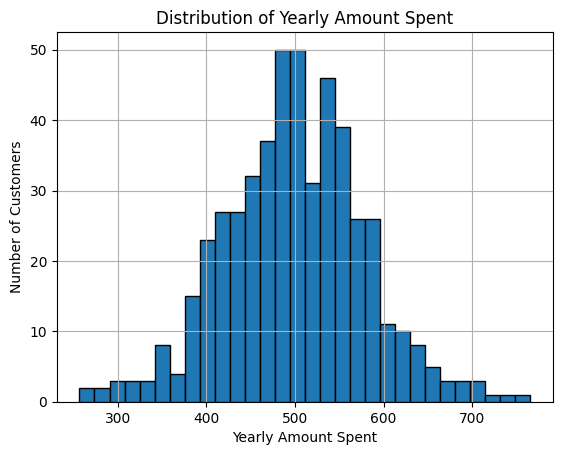

In [29]:
plt.hist(df['Yearly Amount Spent'], bins=30, edgecolor='black')
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

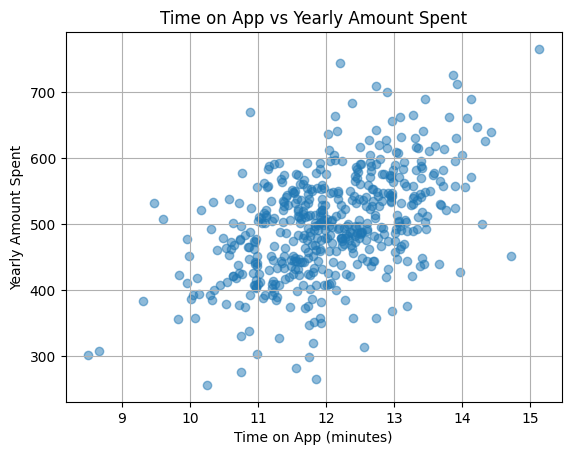

In [30]:
plt.scatter(df['Time on App'], df['Yearly Amount Spent'], alpha=0.5)
plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App (minutes)')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()

In [31]:
X=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### **Model Training**

In [33]:
model=LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

### **Model Predicting**

In [36]:
predictions=model.predict(X_test)

In [37]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

### **Plotting Predicted and Actual Values**

Text(0.5, 1.0, 'Evaluation of our model')

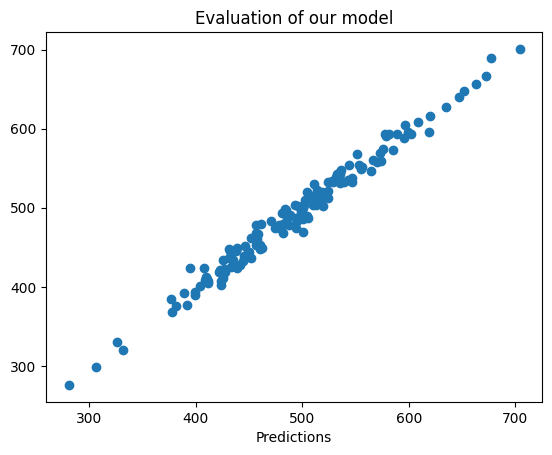

In [38]:
plt.scatter(predictions,y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our model')

In [39]:
print("Mean Absolute Error",mean_absolute_error(y_test,predictions))
print("Mean Squared Error",mean_squared_error(y_test,predictions))
print("RMSE",math.sqrt(mean_squared_error(y_test,predictions)))
print("R² Score:", r2_score(y_test, predictions))

Mean Absolute Error 8.426091641432116
Mean Squared Error 103.91554136503333
RMSE 10.193897260863155
R² Score: 0.9808757641125855


In [40]:
residuals=y_test-predictions

### **Plotting Residual Errors**

(array([ 1.,  0.,  1.,  2.,  5., 10., 10., 17., 27., 12., 15., 10., 12.,
        11.,  7.,  6.,  2.,  1.,  0.,  1.]),
 array([-30.81219   , -27.78837249, -24.76455498, -21.74073747,
        -18.71691996, -15.69310245, -12.66928494,  -9.64546743,
         -6.62164992,  -3.59783241,  -0.57401489,   2.44980262,
          5.47362013,   8.49743764,  11.52125515,  14.54507266,
         17.56889017,  20.59270768,  23.61652519,  26.64034271,
         29.66416022]),
 <BarContainer object of 20 artists>)

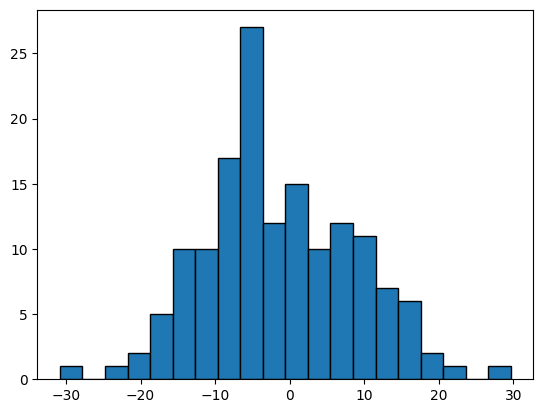

In [41]:
plt.hist(residuals, bins=20, edgecolor='black')